**Examples**

Modeling Vaccination

In [1]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

Downloaded chap11.py


In [4]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation

Immunization

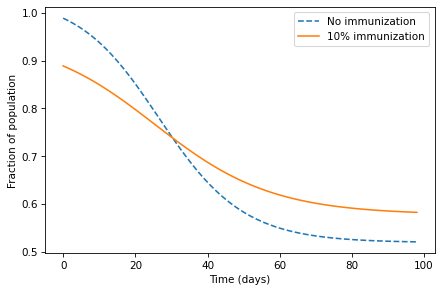

In [5]:
def add_immunization(system, fraction):
    system.init.s -= fraction
    system.init.r += fraction
tc = 3             # time between contacts in days
tr = 4             # recovery time in days
beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day
system = make_system(beta, gamma)
results = run_simulation(system, update_func)
system2 = make_system(beta, gamma)
add_immunization(system2, 0.1)
results2 = run_simulation(system2, update_func)
results.s.plot(style='--', label='No immunization')
results2.s.plot(label='10% immunization')
decorate(xlabel='Time (days)',
         ylabel='Fraction of population')

Metrics

In [6]:
def calc_total_infected(results, system):
    s_0 = results.s[0]
    s_end = results.s[system.t_end]
    return s_0 - s_end
calc_total_infected(results, system)
calc_total_infected(results2, system2)

0.30650802853979753

Sweeping Immunization

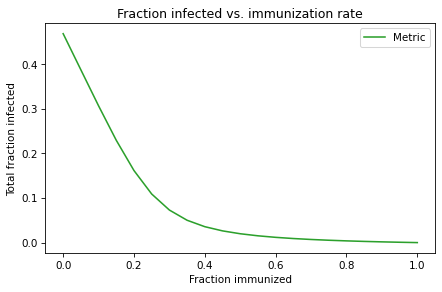

In [7]:
def sweep_immunity(fraction_array):
    sweep = SweepSeries()
    for fraction in fraction_array:
        system = make_system(beta, gamma)
        add_immunization(system, fraction)
        results = run_simulation(system, update_func)
        sweep[fraction] = calc_total_infected(results, system)
    return sweep
fraction_array = linspace(0, 1, 21)
infected_sweep = sweep_immunity(fraction_array)
infected_sweep.plot(color='C2')
decorate(xlabel='Fraction immunized',
         ylabel='Total fraction infected',
         title='Fraction infected vs. immunization rate')

**Exercises**

Exercise 1

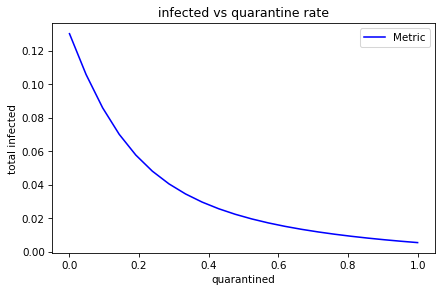

In [12]:
def add_quarantine(system, fraction):
    low = 1
    high = 3
    tr = high - fraction * (high-low)
    system.gamma = 1 / tr
def sweep_quarantine(fraction_array):
    sweep = SweepSeries()
    for fraction in fraction_array:
        system = make_system(beta, gamma)
        add_quarantine(system, fraction)
        results = run_simulation(system, update_func)
        sweep[fraction] = calc_total_infected(results, system)
    return sweep
fraction_array = linspace(0, 1, 22)
infected_sweep = sweep_quarantine(fraction_array)
infected_sweep.plot(color='blue')
decorate(xlabel='quarantined',
         ylabel='total infected',
         title='infected vs quarantine rate')